In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(data.data,columns =data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df["target"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df["flower_name"] = df.target.apply(lambda x : data.target_names[x])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150]

In [9]:
import matplotlib.pyplot as plt

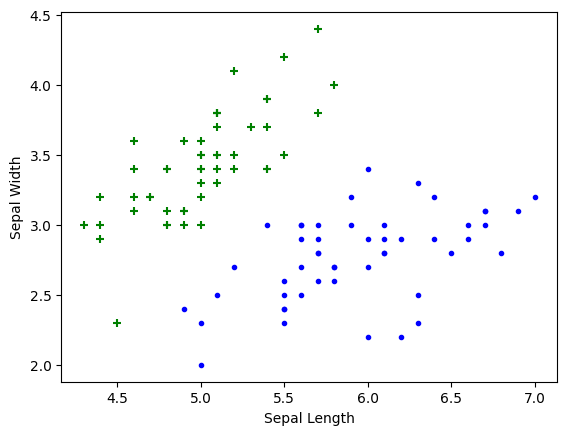

In [10]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

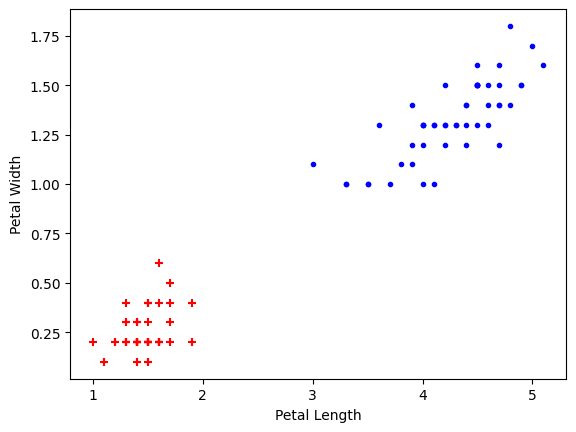

In [11]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="Red",marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="Blue",marker=".")

In [12]:
from sklearn.model_selection import train_test_split
x = df.drop(["target","flower_name"],axis = "columns")
y = df["target"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.svm import SVC

model = SVC()

In [14]:
model.fit(x_train,y_train)

SVC()

In [15]:
model.score(x_test , y_test)

0.9666666666666667

In [16]:
d= pd.DataFrame([[4.8, 4, 1.5, 0.3]], columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
model.predict(d)

array([0])

**Tune Parameter**

**1. Regularization (C)**

In [17]:
model_C = SVC(C=1)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

0.9666666666666667

In [18]:
model_C = SVC(C=10)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

1.0

In [19]:
model_C = SVC(C=100)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

0.9333333333333333

**2. Gamma**

In [20]:
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.8666666666666667

In [21]:
model_g = SVC(gamma=100)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.5666666666666667

In [22]:
model_g = SVC(gamma=1)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)


1.0

**3. Kernel**

In [23]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)
model_linear_kernal.score(x_test, y_test)

1.0

**Exercise**

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1.Measure accuracy of your model using different kernels such as rbf and linear.

2.Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score

3.Use 80% of samples as training data size

In [24]:
from sklearn.datasets import load_digits

digit = load_digits()

In [25]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']